<a href="https://colab.research.google.com/github/NRafif/Machine-Learning/blob/main/CNN_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY

In [ ]:
from google.colab import files    # Untuk upload files
import zipfile                    # Untuk unzip file
import os                         # Untuk interaksi dengan os
import matplotlib.pyplot as plt   # Untuk visualisasi data
import matplotlib.image as mpimg  # Membaca dan memanipulasi gambar
from google.colab import drive    # Untuk mengakses google drive
import tensorflow as tf           # Library utama untuk Machine learning
import numpy as np                # Library untuk komputasi numerik
from PIL import Image             # Library untuk manipulasi gambar

In [ ]:
!pip install -q Kaggle

In [ ]:
# Mount google drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

# PERSIAPAN DATASET


Load Dataset


In [ ]:
!mkdir -p ~/.kaggle                #membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle/         #memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json   #merubah permission file kaggle.json

In [ ]:
!kaggle datasets download -d nofalrafif/cat-skin-disease

In [ ]:
# Extract zipfile
!unzip "/content/cat-skin-disease.zip" -d.

In [ ]:
cat_disease = "/content/CAT SKIN DISEASE"
cat_disease_classes = os.listdir(cat_disease)

In [ ]:
print("Cat Skin Disease Class :")
for class_name in cat_disease_classes:
  if os.path.isdir(os.path.join(cat_disease, class_name)):
    print(class_name)

Cat Skin Disease Class :
Lepra
Dermatitis
Scabies
Ringworm
Health


Preview Gambar


Lepra
Total Image :  437
Resolusi Gambar :  (224, 224, 3)


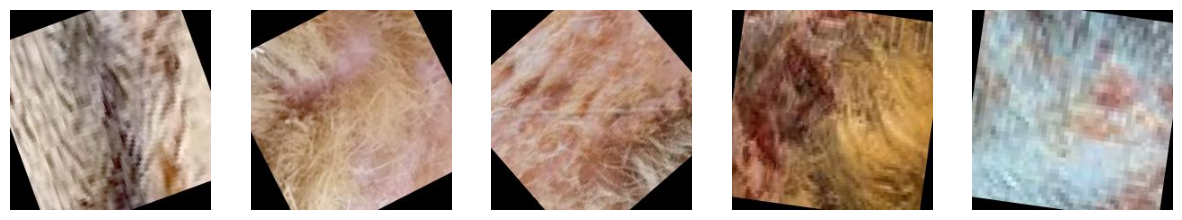


Dermatitis
Total Image :  103
Resolusi Gambar :  (215, 287, 4)


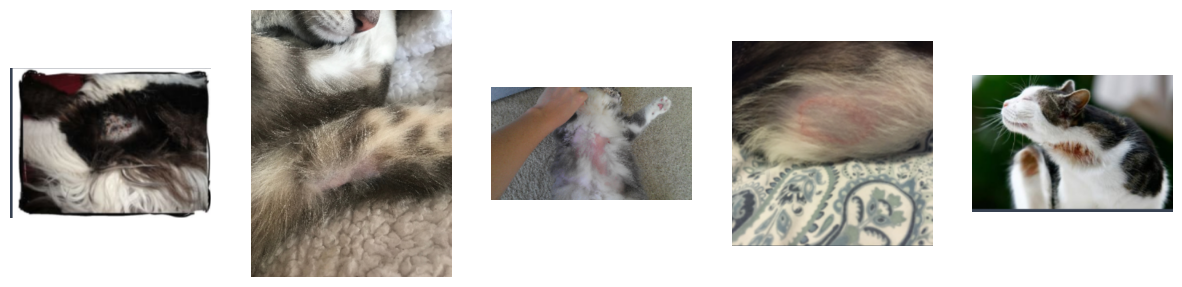


Scabies
Total Image :  509
Resolusi Gambar :  (640, 640, 3)


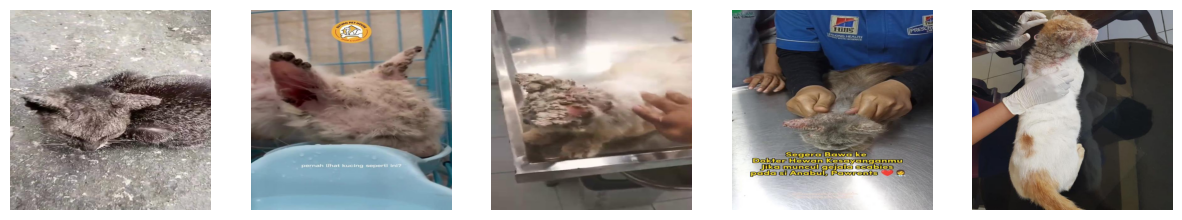


Ringworm
Total Image :  572
Resolusi Gambar :  (266, 287, 4)


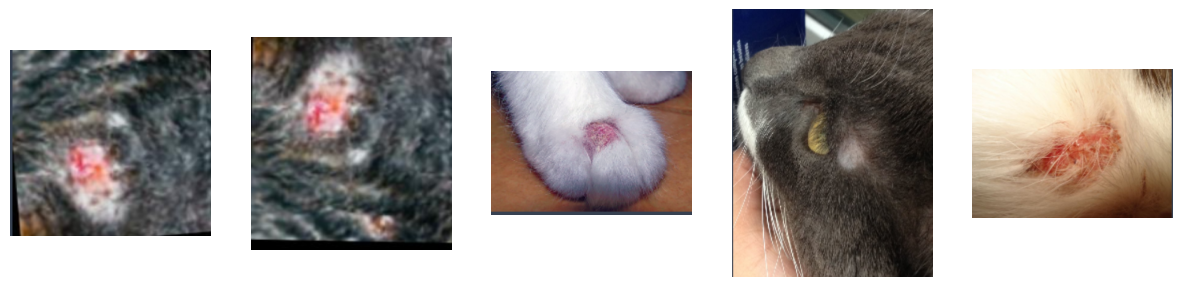


Health
Total Image :  503
Resolusi Gambar :  (640, 640, 3)


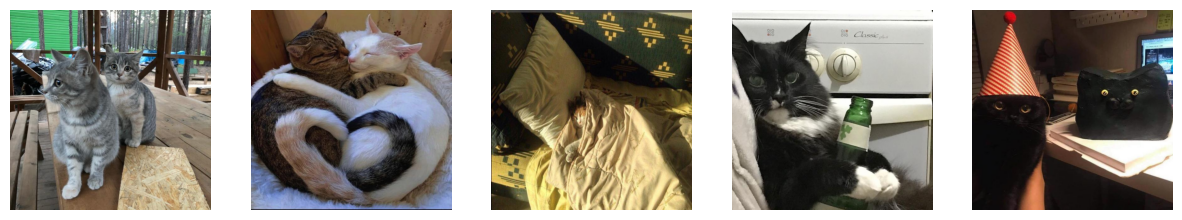

In [ ]:
for item in cat_disease_classes:
    print("")
    print(item)
    class_dir = os.path.join(cat_disease, item)
    class_images = [img for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

    # Menghitung total image di setiap kelas
    num_images = len(class_images)
    print("Total Image : ", num_images)

    # Menghitung resolusi pada gambar pertama
    img_path = os.path.join(class_dir, class_images[0])
    img = mpimg.imread(img_path)
    image_shape = img.shape
    print("Resolusi Gambar : ", image_shape)

    # Menampilkan beberapa gambar
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(class_images))):  # Tampilkan maksimum 5 gambar atau sesuai jumlah yang tersedia
        sp = plt.subplot(1, 5, i + 1)
        img = mpimg.imread(os.path.join(class_dir, class_images[i]))
        plt.axis('off')
        plt.imshow(img)
    plt.show()


# PREPOCESING DATA


Split data

In [ ]:
def train_val_Dataset():
  training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
      cat_disease,
      image_size=(img_height, img_width),
      color_mode='rgb',
      batch_size= batch_size,
      label_mode='categorical',
      validation_split=0.25,
      subset='both',
      seed=42
  )

  return training_dataset, validation_dataset

In [ ]:
# Membuat dataset
training_dataset, validation_dataset = train_val_Dataset()

Found 2124 files belonging to 5 classes.
Using 1593 files for training.
Using 531 files for validation.


In [ ]:
# Melihat batch pertama dari image dan labels
for image_batch, labels_batch in training_dataset.take(1):
  example_batch = image_batch
  labels_batch = labels_batch

  print(f"maximum pixel value of images : {np.max(example_batch)}.\n")
  print(f"Image batch shape: {image_batch.shape}")
  print(f"Labels batch shape: {labels_batch.shape}")

maximum pixel value of images : 255.0.

Image batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 5)


Augmentation

In [ ]:
# def create_augmentation_model():
#   augmentation_model = tf.keras.Sequential([
#       tf.keras.Input(shape=(224, 224, 3)),
#       tf.keras.layers.RandomFlip("horizontal"),
#       tf.keras.layers.RandomRotation(0.2),
#       tf.keras.layers.RandomZoom(0.2),
#       tf.keras.layers.RandomContrast(0.2),
#   ])

#   return augmentation_model


In [ ]:
# # Load your model for augmentation
# data_augmentor = create_augmentation_model()

# # Take a sample image
# sample_image = tf.keras.utils.array_to_img(example_batch[0])

# images = [sample_image]

# # Apply random augmentation 5 times
# for _ in range(5):
# 	image_aug = data_augmentor(tf.expand_dims(sample_image, axis=0))
# 	image_aug = tf.keras.utils.array_to_img(tf.squeeze(image_aug))
# 	images.append(image_aug)


# fig, axs = plt.subplots(1, 6, figsize=(15, 5))
# for ax, image, title in zip(axs, images, ['Original Image', 'Augmented 1', 'Augmented 2', 'Augmented 3','Augmented 4','Augmented 5']):
#     ax.imshow(image, cmap='gray')
#     ax.set_title(title)
#     ax.axis('off')

# plt.show()

# MODELLING

In [ ]:
def create_model():

  # augmentation_layers = create_augmentation_model()

  model = tf.keras.models.Sequential([
      # augmentation_layers,

        # Layer 1: Convolutional + MaxPooling
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Layer 2: Convolutional + MaxPooling
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Layer 3: Convolutional + MaxPooling
        tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Layer 4: Convolutional + MaxPooling
        tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Flatten layer
        tf.keras.layers.Flatten(),

        # Dense layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        # Output layer
        tf.keras.layers.Dense(len(cat_disease_classes), activation='softmax')
    ])
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )


  return model

In [ ]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 128)     5

Buat fungsi callback

In [ ]:
class early_stopping_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get('accuracy')>=0.80 and logs.get('val_accuracy')>=0.75:
      print("\nReached 80% train accuracy and 75% validation accuracy so cancelling training!")
      self.model.stop_training = True

Mulai train model

In [ ]:
history = create_model().fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping_callback()]
)

Epoch 1/100
50/50 [==============================] - 105s 2s/step - loss: 2.0589 - accuracy: 0.3446 - val_loss: 1.4467 - val_accuracy: 0.3955
Epoch 2/100
50/50 [==============================] - 99s 2s/step - loss: 1.6111 - accuracy: 0.4369 - val_loss: 1.6031 - val_accuracy: 0.3879
Epoch 3/100
50/50 [==============================] - 98s 2s/step - loss: 1.4538 - accuracy: 0.4840 - val_loss: 2.4401 - val_accuracy: 0.3089
Epoch 4/100
50/50 [==============================] - 97s 2s/step - loss: 1.3547 - accuracy: 0.5185 - val_loss: 2.8158 - val_accuracy: 0.3183
Epoch 5/100
50/50 [==============================] - 97s 2s/step - loss: 1.2717 - accuracy: 0.5537 - val_loss: 2.4801 - val_accuracy: 0.3578
Epoch 6/100
50/50 [==============================] - 95s 2s/step - loss: 1.2097 - accuracy: 0.5669 - val_loss: 2.5036 - val_accuracy: 0.4068
Epoch 7/100
50/50 [==============================] - 96s 2s/step - loss: 1.0859 - accuracy: 0.6051 - val_loss: 2.5655 - val_accuracy: 0.4256
Epoch 8/100


# HASIL MODEL

## Menghitung Accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Training and Validation Accuracy and Loss')

# Tampilkan data dan label untuk setiap subplot
data_labels = [
    (acc, val_acc, 'Accuracy'),
    (loss, val_loss, 'Loss')
]

# iterasi seriap subplot dan data
for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    axs[i].plot(epochs_range, data[0], 'r', label="Training " + label)
    axs[i].plot(epochs_range, data[1], 'b', label="Validation " + label)
    axs[i].legend()
    axs[i].set_xlabel('epochs')

plt.show()

NameError: name 'history' is not defined

## Mengetes Model

In [ ]:
def predict_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    predicted_class_name = cat_disease_classes[predicted_class]

    return predicted_class_name, prediction


# Upload file
uploaded = files.upload()

# Informasi file yang diupload
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Membuat prediksi
image_path = fn # Menggunakan nama file yang diupload
predicted_class_name, prediction = predict_image(image_path, create_model()) # Gunakan model yang telah dilatih untuk meprediksi

print(f"Predicted class: {predicted_class_name}")
print(f"Prediction probabilities: {prediction}")

# Menampilkan image yang diupload beserta labelnya
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class_name}")
plt.show()